---------- First 5 Rows ----------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  

C:\Users\ASHOK KUMAR\AppData\Local\Temp\ipykernel_90192\395652014.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


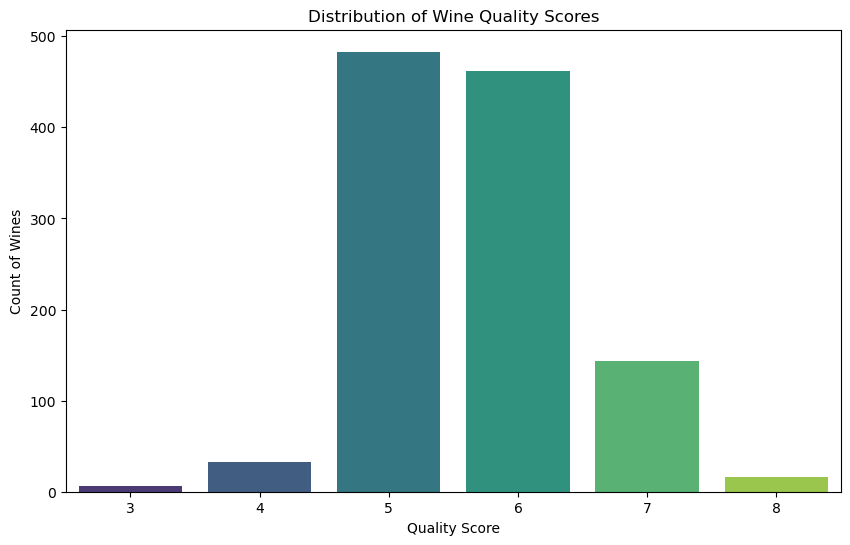

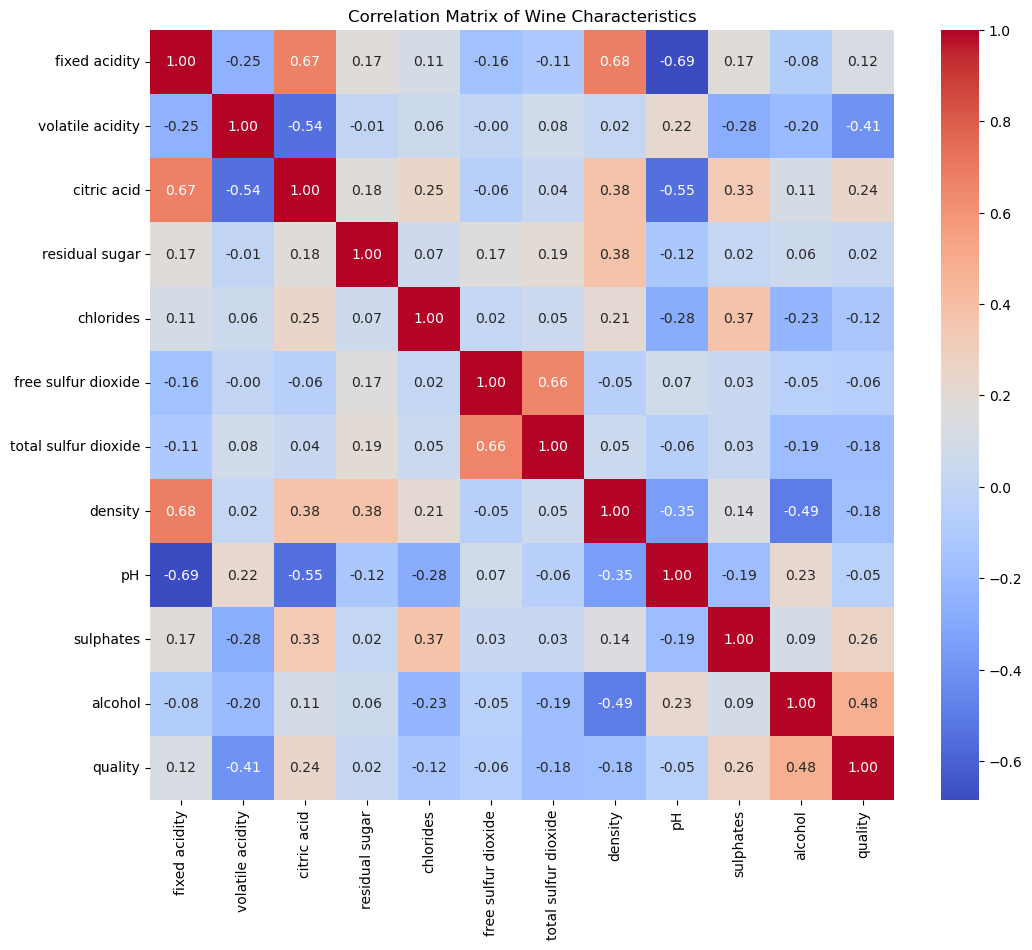

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WineQT.csv')

print("---------- First 5 Rows ----------")
print(df.head())

print("\n---------- Data Info ----------")
df.info()

print("\n---------- Quality Score Distribution ----------")
print(df['quality'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count of Wines')
plt.show()

plt.figure(figsize=(12, 10))
corr_matrix = df.drop('Id', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Characteristics')
plt.show()

In [2]:
df['quality_label'] = df['quality'].apply(lambda value: 1 if value >= 7 else 0)

X = df.drop(['quality', 'quality_label', 'Id'], axis=1)
y = df['quality_label']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (1143, 11)
Target (y) shape: (1143,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train_scaled, y_train)

svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)

print("All three models have been trained successfully!")

All three models have been trained successfully!


In [6]:
rf_preds = rf_model.predict(X_test_scaled)
sgd_preds = sgd_model.predict(X_test_scaled)
svc_preds = svc_model.predict(X_test_scaled)

In [7]:
from sklearn.metrics import accuracy_score, classification_report

# 1. Evaluate Random Forest
print("---------- Random Forest Classifier ----------")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.2f}")
print(classification_report(y_test, rf_preds))

# 2. Evaluate SGD Classifier
print("\n---------- SGD Classifier ----------")
print(f"Accuracy: {accuracy_score(y_test, sgd_preds):.2f}")
print(classification_report(y_test, sgd_preds))

# 3. Evaluate SVC
print("\n---------- Support Vector Classifier (SVC) ----------")
print(f"Accuracy: {accuracy_score(y_test, svc_preds):.2f}")
print(classification_report(y_test, svc_preds))

---------- Random Forest Classifier ----------
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       197
           1       0.79      0.59      0.68        32

    accuracy                           0.92       229
   macro avg       0.86      0.78      0.82       229
weighted avg       0.92      0.92      0.92       229


---------- SGD Classifier ----------
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       197
           1       0.57      0.62      0.60        32

    accuracy                           0.88       229
   macro avg       0.75      0.77      0.76       229
weighted avg       0.89      0.88      0.88       229


---------- Support Vector Classifier (SVC) ----------
Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       197
           1       0.76      0.41      0.53        3